## Project 4 Random Forest trial

- Opt for using last 5 years - start small and then branch out if time permitting
- Columns to drop:
    - TREND
    - Avg Age Years and Schooling
    - Trend Value
    - NMSCI
    - GAIN
    - GAIN CI
    - Non-Attempt
    - NonStated
    - Withdrawn
    - NOD NMS Base (last 3 columns are stupid!)
    - Band grading 1 - 6. Certain grades have different bands - based on the score.  Score by percentage.
        - can put in presentation the different band types and %'s
    - 5220 score for Percentils values are Spelling, Parental Education and Parental Occupation subgroups BLANK DATA. = WHY? National.... RACH to look further into this one.

In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline


## Loading and Preprocessing Loans Encoded Data

In [2]:
# Loading data
df_Naplan = pd.read_csv("Naplan_results.csv")
df_Naplan.head(5)

,CALENDAR_YEAR,YEAR_LEVEL,DOMAIN,STATE,SUBGROUP,ENROLLED_STUDENTS,MEAN,MEAN_CI,MEAN_SD,NMS,...,PCTL05,PCTL20,PCTL80,PCTL95,TREND,TREND_VALUE,NOD_MEAN_PREV,NOD_NMS_PREV,NOD_MEAN_BASE,NOD_NMS_BASE
0,2008,3,Grammar and Punctuation,ACT,All,4366.0,419.6,6.2,83.1,93.6,...,276.5,350.1,490.2,551.7,Flat,434.8,NaN,NaN,NaN,NaN
1,2008,3,Grammar and Punctuation,ACT,Parental Education: Bachelor,167.0,445.2,NaN,79.7,95.8,...,308.7,381.3,513.0,565.4,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,3,Grammar and Punctuation,ACT,Parental Education: Certificate,72.0,396.1,NaN,91.0,90.0,...,240.9,319.4,476.6,546.1,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,3,Grammar and Punctuation,ACT,Parental Education: Diploma,52.0,401.4,NaN,69.1,96.9,...,283.7,342.1,456.3,519.2,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,3,Grammar and Punctuation,ACT,Parental Education: Not stated,4009.0,419.8,NaN,82.7,93.7,...,278.0,351.0,489.8,551.1,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
cols= df_Naplan.columns
cols

Index(['CALENDAR_YEAR', 'YEAR_LEVEL', 'DOMAIN', 'STATE', 'SUBGROUP',
       'ENROLLED_STUDENTS', 'MEAN', 'MEAN_CI', 'MEAN_SD', 'NMS', 'NMS_CI',
       'GAIN', 'GAIN_CI', 'EXEMPT', 'ABSENT', 'ASSESSED', 'WITHDRAWN',
       'NONATTEMPT', 'PARTICIPATION_RATE', 'PARTICIPATION_NUMBER',
       'NOT_STATED', 'AVERAGE_AGE', 'YEARS_OF_SCHOOLING', 'BANDCOL1',
       'BANDCOL2', 'BANDCOL3', 'BANDCOL4', 'BANDCOL5', 'BANDCOL6', 'PCTL05',
       'PCTL20', 'PCTL80', 'PCTL95', 'TREND', 'TREND_VALUE', 'NOD_MEAN_PREV',
       'NOD_NMS_PREV', 'NOD_MEAN_BASE', 'NOD_NMS_BASE'],
      dtype='object')

In [4]:
col_drop= ['NONATTEMPT','NMS_CI', 'NOT_STATED','AVERAGE_AGE', 'YEARS_OF_SCHOOLING','TREND', 'TREND_VALUE','WITHDRAWN','NOD_MEAN_PREV','NOD_NMS_PREV', 'NOD_MEAN_BASE', 'NOD_NMS_BASE','GAIN_CI', 'GAIN', 'MEAN_CI', 'MEAN', 'MEAN_CI', 'MEAN_SD', 'DOMAIN', 'PCTL05',
       'PCTL20', 'PCTL80', 'PCTL95']

In [5]:
df_Naplan.drop(columns=col_drop, axis=1, inplace=True)

In [6]:
df_Naplan = df_Naplan[df_Naplan['YEAR_LEVEL'] > 3]
df_Naplan = df_Naplan[df_Naplan['STATE'] == "AUS"]
df_Naplan

,CALENDAR_YEAR,YEAR_LEVEL,STATE,SUBGROUP,ENROLLED_STUDENTS,NMS,EXEMPT,ABSENT,ASSESSED,PARTICIPATION_RATE,PARTICIPATION_NUMBER,BANDCOL1,BANDCOL2,BANDCOL3,BANDCOL4,BANDCOL5,BANDCOL6
689,2008,5,AUS,All,271423.0,91.9,1.5,2.7,95.0,96.9,263126,6.5,11.0,21.3,26.4,19.9,13.4
690,2008,5,AUS,Parental Education: Bachelor,41041.0,96.9,1.2,1.7,96.8,98.0,40233,1.9,5.1,14.3,25.8,26.7,24.9
691,2008,5,AUS,Parental Education: Certificate,41794.0,92.0,1.4,1.9,96.4,97.8,40871,6.5,13.0,24.7,28.2,17.7,8.4
692,2008,5,AUS,Parental Education: Diploma,22002.0,94.5,1.4,1.9,96.5,97.9,21547,4.1,9.2,21.2,28.9,21.9,13.3
693,2008,5,AUS,Parental Education: Not stated,128634.0,91.8,1.2,3.5,94.9,96.2,123691,7.0,11.0,21.3,26.3,19.7,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57990,2022,9,AUS,Outer regional,25648.0,74.3,1.8,13.2,80.0,82.1,21067,23.9,22.5,24.0,17.9,7.4,2.5
57991,2022,9,AUS,Remote,3188.0,66.2,2.8,17.7,76.4,79.6,2537,31.0,21.2,21.4,15.1,6.7,1.7
57992,2022,9,AUS,Very remote,2016.0,34.4,1.0,47.6,47.7,49.4,996,64.6,15.4,10.7,5.8,1.9,0.6
57993,2022,9,AUS,Parental Education: Year 11,26319.0,62.1,4.2,19.4,71.3,76.1,20016,33.8,24.8,21.1,11.6,3.8,0.8


In [7]:
df_Naplan.isna().sum()

CALENDAR_YEAR           0
YEAR_LEVEL              0
STATE                   0
SUBGROUP                0
ENROLLED_STUDENTS       0
NMS                     0
EXEMPT                  0
ABSENT                  0
ASSESSED                0
PARTICIPATION_RATE      0
PARTICIPATION_NUMBER    0
BANDCOL1                0
BANDCOL2                0
BANDCOL3                0
BANDCOL4                0
BANDCOL5                0
BANDCOL6                0
dtype: int64

In [8]:
df_Naplan.dtypes

CALENDAR_YEAR             int64
YEAR_LEVEL                int64
STATE                    object
SUBGROUP                 object
ENROLLED_STUDENTS       float64
NMS                     float64
EXEMPT                  float64
ABSENT                  float64
ASSESSED                float64
PARTICIPATION_RATE      float64
PARTICIPATION_NUMBER      int64
BANDCOL1                float64
BANDCOL2                float64
BANDCOL3                float64
BANDCOL4                float64
BANDCOL5                float64
BANDCOL6                float64
dtype: object

In [9]:
df_Naplan_copy = df_Naplan.copy()

In [12]:
# create dummy variables
df_data = pd.get_dummies(df_Naplan)
df_data.head()

,CALENDAR_YEAR,YEAR_LEVEL,ENROLLED_STUDENTS,NMS,EXEMPT,ABSENT,ASSESSED,PARTICIPATION_RATE,PARTICIPATION_NUMBER,BANDCOL1,...,SUBGROUP_Parental Education: Year 11,SUBGROUP_Parental Education: Year 12,SUBGROUP_Parental Occupation: Group 1,SUBGROUP_Parental Occupation: Group 2,SUBGROUP_Parental Occupation: Group 3,SUBGROUP_Parental Occupation: Group 4,SUBGROUP_Parental Occupation: Not in paid work,SUBGROUP_Parental Occupation: Not stated,SUBGROUP_Remote,SUBGROUP_Very remote
689,2008,5,271423.0,91.9,1.5,2.7,95.0,96.9,263126,6.5,...,0,0,0,0,0,0,0,0,0,0
690,2008,5,41041.0,96.9,1.2,1.7,96.8,98.0,40233,1.9,...,0,0,0,0,0,0,0,0,0,0
691,2008,5,41794.0,92.0,1.4,1.9,96.4,97.8,40871,6.5,...,0,0,0,0,0,0,0,0,0,0
692,2008,5,22002.0,94.5,1.4,1.9,96.5,97.9,21547,4.1,...,0,0,0,0,0,0,0,0,0,0
693,2008,5,128634.0,91.8,1.2,3.5,94.9,96.2,123691,7.0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Load and prepare data
X = df_data.drop(columns=['SUBGROUP_Remote'])
y = df_data['SUBGROUP_Remote']

In [22]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
#Create Random Forest model
model = RandomForestClassifier(n_estimators=100,max_depth =10, random_state=42)

In [24]:
# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [26]:
# Create Random Forest model
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

In [31]:
# Define target vector
y = df_data["SUBGROUP_Remote"].ravel()

In [32]:
# Define features set
X = df_data
X.head()
X.drop("SUBGROUP_Remote", axis=1, inplace=True)

In [33]:
# Creating StandardScaler instance
scaler = StandardScaler()
# X_scaled = 
scaler.fit_transform(X)


array([[-1.92190927, -1.22474487,  2.36517897, ..., -0.20114407,
        -0.20114407, -0.13311658],
       [-1.92190927, -1.22474487, -0.44016478, ..., -0.20114407,
        -0.20114407, -0.13311658],
       [-1.92190927, -1.22474487, -0.43099556, ..., -0.20114407,
        -0.20114407, -0.13311658],
       ...,
       [ 1.47370308,  1.22474487, -0.91536918, ..., -0.20114407,
        -0.20114407,  7.51221228],
       [ 1.47370308,  1.22474487, -0.61943344, ..., -0.20114407,
        -0.20114407, -0.13311658],
       [ 1.47370308,  1.22474487, -0.704404  , ..., -0.20114407,
        -0.20114407, -0.13311658]])

In [34]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [35]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Random Forest Model

In [36]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [37]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

## Making Predictions Using the Random Forest Model

In [38]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

## Model Evaluation

In [39]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [40]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1010,0
Actual 1,2,22


Accuracy Score : 0.9980657640232108
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1010
           1       1.00      0.92      0.96        24

    accuracy                           1.00      1034
   macro avg       1.00      0.96      0.98      1034
weighted avg       1.00      1.00      1.00      1034



## Feature Importance

In [41]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.20111436732196042, 'ENROLLED_STUDENTS'),
 (0.17678998999331294, 'PARTICIPATION_NUMBER'),
 (0.09760610226339106, 'EXEMPT'),
 (0.05947984771034188, 'BANDCOL4'),
 (0.05907642543964253, 'BANDCOL5'),
 (0.0483199997007301, 'ABSENT'),
 (0.045185658877393814, 'BANDCOL6'),
 (0.04355103345637772, 'BANDCOL2'),
 (0.043088003938044635, 'NMS'),
 (0.0423659881512163, 'BANDCOL1'),
 (0.03461108240304594, 'PARTICIPATION_RATE'),
 (0.03169879176016456, 'BANDCOL3'),
 (0.03138062267661724, 'ASSESSED'),
 (0.026751384908744603, 'SUBGROUP_Indigenous Outer regional'),
 (0.013878241375279913, 'YEAR_LEVEL'),
 (0.011562745305882909, 'SUBGROUP_Non-Indigenous Very remote'),
 (0.010209386140158988, 'CALENDAR_YEAR'),
 (0.007928074148887397, 'SUBGROUP_Non-Indigenous Remote'),
 (0.007665185823060641, 'SUBGROUP_Indigenous Inner regional'),
 (0.0022228772331769685, 'SUBGROUP_Very remote'),
 (0.001236619629756583, 'SUBGROUP_Indigenous Remote'),
 (0.0008290089759014665, 'SUBGROUP_Indigenous'),
 (0.0006838634028311766, '

<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

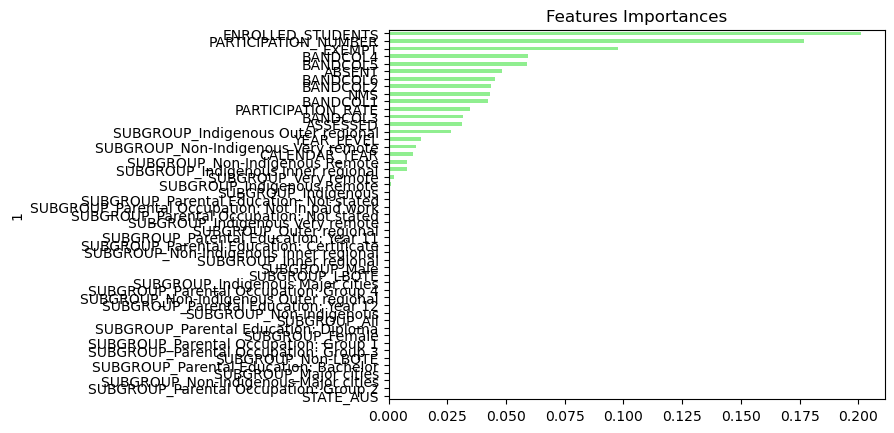

In [42]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)